# Remoção de um dado em modelos de Regressão linear

Vamos criar um conjunto de dados com outliers e ver como a remoção deles afeta o modelo de regressão linear.

In [76]:
# conjunto de dados de treinamento linear com pequeno ruido gaussiano

import numpy as np
import matplotlib.pyplot as plt

# numero de amostras
N = 20

# parametros da reta
a = 2
b = 3

# ruido gaussiano
mu = 0
sigma = 0.5

# gerando os dados
x = np.random.rand(N) * 10
y = a*x + b + np.random.normal(mu, sigma, N)

# Adicionando um outlier
x_with_outlier = np.append(x, 10)
y_with_outlier = np.append(y, 0)

Text(0, 0.5, 'y')

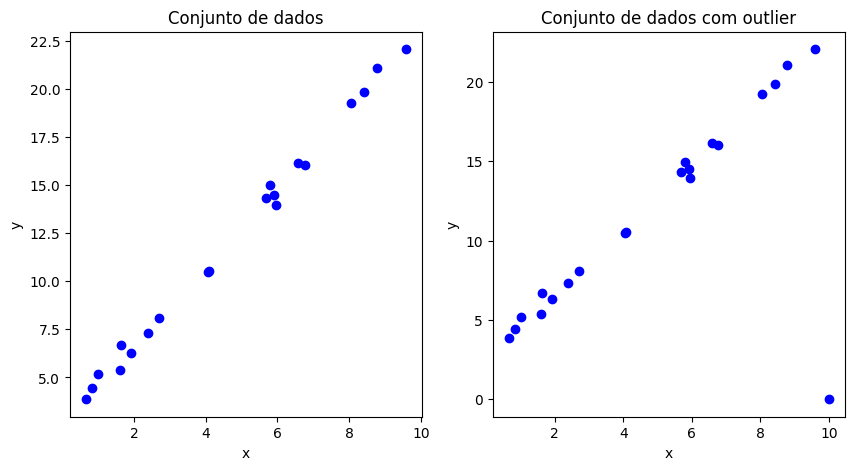

In [77]:
# plotando os dados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')



### Treinamento os modelos

Assim como no paper, nossa ideia é treinar o modelo com o outlier e depois remover ele sem re-treinar o modelo. Daí, vamos comparar o modelo treinado com e sem o outlier.

In [78]:
def linear_model(x, y):
    x = np.array(x)
    y = np.array(y)
    x = np.c_[np.ones(x.shape[0]), x]
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta

In [79]:
# Modelo linear sem outlier
beta = linear_model(x, y)

# Modelo linear com outlier
beta_with_outlier = linear_model(x_with_outlier, y_with_outlier)

print ('Coeficientes do modelo sem outlier:', beta)
print ('Coeficientes do modelo com outlier:', beta_with_outlier)

Coeficientes do modelo sem outlier: [2.59992484 2.04024162]
Coeficientes do modelo com outlier: [4.56051621 1.41319347]


Text(0, 0.5, 'y')

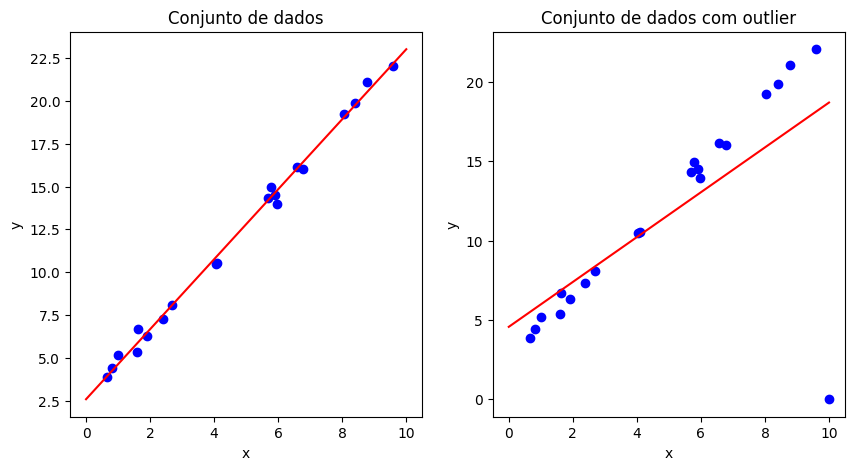

In [80]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


## Removendo o ponto

Com o modelo treinado, desejamos remover o outlier e, sem re-treinar o modelo, ver se ele se aproxima do modelo treinado sem o outlier.

In [81]:
x_without_outlier = x_with_outlier[:-1]
y_without_outlier = y_with_outlier[:-1]

In [82]:
def gradient_loss(beta, x_i, y_i):
    # Adiciona um termo de bias ao vetor de entrada
    x_i = np.append(1, x_i)

    # Calcula o gradiente da perda para a amostra (x_i, y_i) com base nos coeficientes beta
    grad_loss = - 2 * (y_i - beta @ x_i) * x_i
    return grad_loss

def Hessian_loss(beta, X, Y):
    # Adiciona uma coluna de 1s para representar o termo de bias
    X = np.column_stack([np.ones(len(X)), X])
    
    # Calcula a Hessiana da perda com base nos coeficientes beta e no conjunto de dados X e Y
    Hessian = 2 * X.T @ X
    return Hessian

In [83]:
beta_with_outlier

array([4.56051621, 1.41319347])

In [84]:
w_star = np.array(beta_with_outlier)

# Coloca mais uma dimensão no vetor w_star
w_star = w_star[:, np.newaxis].T

lambda_val = 0.1
Delta = lambda_val * w_star + np.array([gradient_loss(beta_with_outlier, x_with_outlier[-1], y_with_outlier[-1])])

H_w_star_inv = np.linalg.inv(Hessian_loss(beta_with_outlier, x_with_outlier[:-1], y_with_outlier[:-1]))

w_minus = w_star + (H_w_star_inv @ Delta.T).T

In [85]:
print ('Coeficientes do modelo treinando sem o outlier:', beta)
print ('Coeficientes do modelo treinando com o outlier:', beta_with_outlier)
print ('Coeficientes do modelo treinando com o outlier e depois removendo:', w_minus)

Coeficientes do modelo treinando sem o outlier: [2.59992484 2.04024162]
Coeficientes do modelo treinando com o outlier: [4.56051621 1.41319347]
Coeficientes do modelo treinando com o outlier e depois removendo: [[2.63958793 2.03412065]]


Podemos ver que ao remover o dado outlier, o modelo se aproxima do modelo treinado sem o outlier.

Text(0, 0.5, 'y')

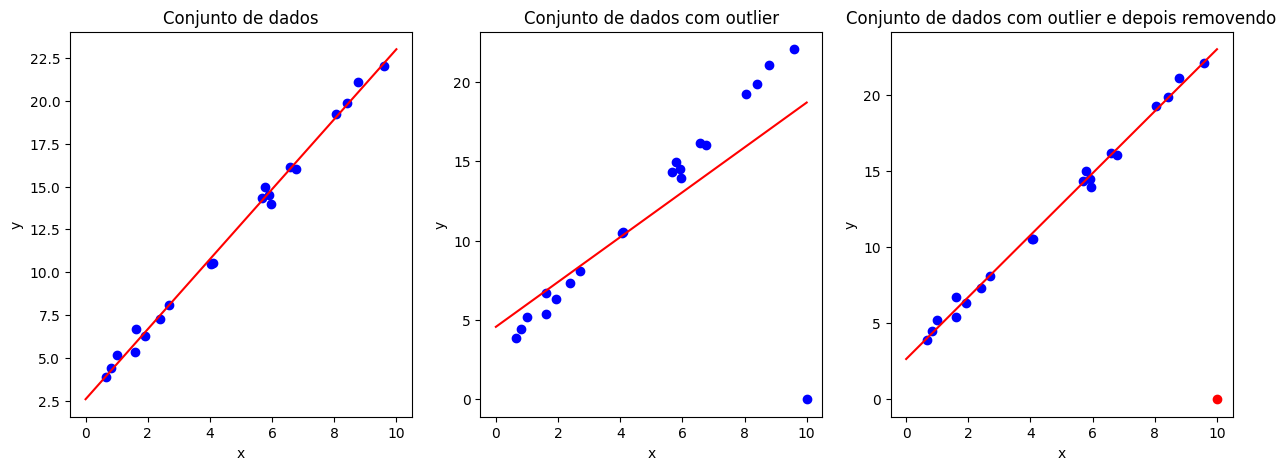

In [86]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus = w_minus[0, 0] + w_minus[0, 1]*x_plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


ax[2].scatter(x_with_outlier[:-1], y_with_outlier[: -1], color='blue')
ax[2].scatter(x_with_outlier[-1], y_with_outlier[-1], color='red')
ax[2].plot(x_plot, y_plot_minus, color='red')
ax[2].set_title('Conjunto de dados com outlier e depois removendo')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

